
Trees = 5
Confusion Matrix:
 [[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]
Accuracy: 0.9722
Precision: 0.9744
Recall: 0.9762
F1 Score: 0.9743

Trees = 10
Confusion Matrix:
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Trees = 50
Confusion Matrix:
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Trees = 100
Confusion Matrix:
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Trees = 200
Confusion Matrix:
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


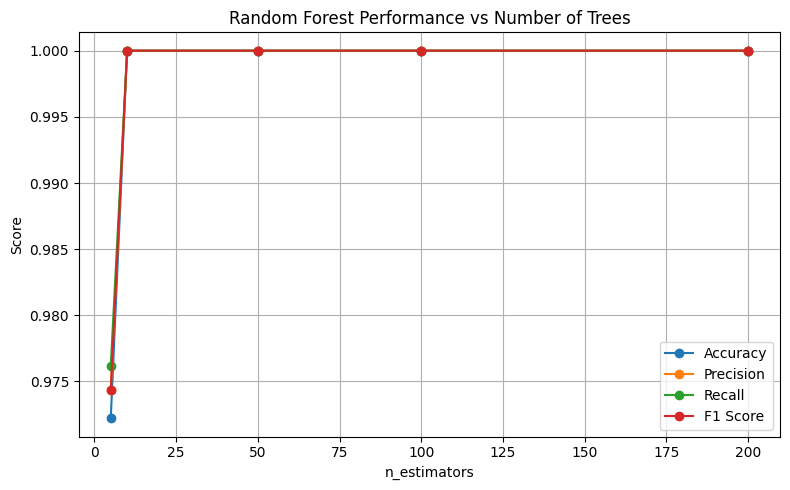


Inference:
• Performance improves with more trees up to ~100.
• After that, gains are minimal.
• 100–200 trees offer a good trade-off between accuracy and efficiency.


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# === Load your dataset ===
# df = pd.read_csv('your_data.csv')
# Separate features and target:
# X = df.drop('target_column_name', axis=1).values
# y = df['target_column_name'].values

# === Load dataset ===
data = load_wine()
X = StandardScaler().fit_transform(data.data)
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

# Train & evaluate
results = []
for n in [5, 10, 50, 100, 200]:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    results.append({
        "Trees": n,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

    print(f"\nTrees = {n}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Plot results
df = pd.DataFrame(results)
plt.figure(figsize=(8,5))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    plt.plot(df["Trees"], df[metric], marker='o', label=metric)
plt.title("Random Forest Performance vs Number of Trees")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Inference
print("\nInference:")
print("• Performance improves with more trees up to ~100.")
print("• After that, gains are minimal.")
print("• 100–200 trees offer a good trade-off between accuracy and efficiency.")